In [1]:
import pandas as pd
import datetime
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

## 1. M0 Maio

In [2]:
df1 = pd.read_csv('../data/m0_maio/target.csv')

In [3]:
df1.columns

Index(['CLIENTID', 'M0', 'DATA_CONTRATACAO_CREDITO', 'RANDOM_ID', 'ID_NORM',
       'RANDOM_ID_NORM', 'EVER60', 'VALOR_ATRASO_MAX_EVER60',
       'VALOR_ATRASO_MAX_MENOR60D', 'ATRASO_M0', 'VALOR_ATRASO_M0',
       'STATUS_CONTA_M0'],
      dtype='object')

In [4]:
df1.groupby('M0')['CLIENTID'].count()

M0
2019-05-03 00:00:00.000    17654
2019-05-10 00:00:00.000    17654
2019-05-17 00:00:00.000    17654
2019-05-24 00:00:00.000    17654
2019-05-31 00:00:00.000    17654
Name: CLIENTID, dtype: int64

In [5]:
# df1.M0.hist()/

In [6]:
df1.CLIENTID.count()

88270

In [7]:
df1.head(3)

CLIENTID                       M0 DATA_CONTRATACAO_CREDITO  RANDOM_ID  \
0   1022285  2019-05-03 00:00:00.000  2019-01-21 11:48:26.180   0.761781   
1   1573997  2019-05-24 00:00:00.000  2019-04-04 11:28:45.187   0.041815   
2    152251  2019-05-17 00:00:00.000  2019-01-13 13:58:23.070   0.550462   

    ID_NORM  RANDOM_ID_NORM  EVER60  VALOR_ATRASO_MAX_EVER60  \
0  0.407689        0.178484       0                        0   
1  0.088010        0.608009       0                        0   
2  0.911814        0.519254       0                        0   

   VALOR_ATRASO_MAX_MENOR60D  ATRASO_M0  VALOR_ATRASO_M0 STATUS_CONTA_M0  
0                          1          0                0           Ativo  
1                          1          0                0           Ativo  
2                          1          1               26       Bloqueado

In [8]:
df1.EVER60.value_counts(), 13914/74358

(0    74152
 1    14118
 Name: EVER60, dtype: int64, 0.18712176228516098)

In [9]:
df1_bloqueados_aptos = df1[(df1['STATUS_CONTA_M0']=='Bloqueado')&(df1['VALOR_ATRASO_M0']<60)]

In [10]:
df1_bloqueados_aptos.EVER60.value_counts()

1    4286
0    1543
Name: EVER60, dtype: int64

## 2. M0 Junho

In [11]:
df2 = pd.read_csv('../data/m0_junho/target.csv')

In [12]:
df2.CLIENTID.count(), 109405/4

(109405, 27351.25)

In [13]:
df2.EVER60.value_counts(), 18376/91029

(0    91029
 1    18376
 Name: EVER60, dtype: int64, 0.20186973382108997)

## 3. M0 Julho

In [14]:
df3 = pd.read_csv('../data/m0_julho/target.csv')

In [15]:
df3.EVER60.value_counts()

0    103872
1     22350
Name: EVER60, dtype: int64

In [16]:
# len(df3.ClientId.unique())

## 4. M0 Agosto

In [17]:
df4 = pd.read_csv('../data/m0_agosto/target.csv')

In [18]:
df4.EVER60.value_counts()

0    115084
1     26501
Name: EVER60, dtype: int64

## 5. M0 Setembro

In [19]:
df5 = pd.read_csv('../data/m0_setembro/target.csv')

In [20]:
df5.EVER60.value_counts()

0    115084
1     26501
Name: EVER60, dtype: int64

### Evers60

In [21]:
df1_EVER60= df1[df1['EVER60']==1]
df1_nao_EVER60 = df1[df1['EVER60']==0]

df2_EVER60 = df2[df2['EVER60']==1]
df2_nao_EVER60 = df2[df2['EVER60']==0]


df3_EVER60 = df3[df3['EVER60']==1]
df3_nao_EVER60 = df3[df3['EVER60']==0]


df4_EVER60 = df4[df4['EVER60']==1]
df4_nao_EVER60 = df4[df4['EVER60']==0]


# df5_EVER60_ = df5[df5['EVER60_']==1]
# df5_nao_EVER60_ = df5[df5['EVER60_']==0]

## Interseccao Clientes

### 3 e 4

In [22]:
df3_v2_EVER60 = df3_EVER60[~df3_EVER60.CLIENTID.isin(df4_EVER60.CLIENTID)]
df3_v2_nao_EVER60 = df3_nao_EVER60[~df3_nao_EVER60.CLIENTID.isin(df4_nao_EVER60.CLIENTID)]

In [23]:
df3_v2_EVER60.count()

CLIENTID                     95
M0                           95
DATA_CONTRATACAO_CREDITO     95
RANDOM_ID                    95
ID_NORM                      95
RANDOM_ID_NORM               95
EVER60                       95
VALOR_ATRASO_MAX_EVER60      95
VALOR_ATRASO_MAX_MENOR60D    95
ATRASO_M0                    95
VALOR_ATRASO_M0              95
STATUS_CONTA_M0              95
dtype: int64

In [24]:
df3_v2_nao_EVER60.count()

CLIENTID                     2230
M0                           2230
DATA_CONTRATACAO_CREDITO     2230
RANDOM_ID                    2230
ID_NORM                      2230
RANDOM_ID_NORM               2230
EVER60                       2230
VALOR_ATRASO_MAX_EVER60      2230
VALOR_ATRASO_MAX_MENOR60D    2230
ATRASO_M0                    2230
VALOR_ATRASO_M0              2230
STATUS_CONTA_M0              2230
dtype: int64

### 1 e 4

In [25]:
df1_v2_EVER60 = df1_EVER60[~df1_EVER60.CLIENTID.isin(df4_EVER60.CLIENTID)]
df1_v2_nao_EVER60 = df1_nao_EVER60[~df1_nao_EVER60.CLIENTID.isin(df4_nao_EVER60.CLIENTID)]

In [26]:
df1_v2_EVER60.count()

CLIENTID                     194
M0                           194
DATA_CONTRATACAO_CREDITO     194
RANDOM_ID                    194
ID_NORM                      194
RANDOM_ID_NORM               194
EVER60                       194
VALOR_ATRASO_MAX_EVER60      194
VALOR_ATRASO_MAX_MENOR60D    194
ATRASO_M0                    194
VALOR_ATRASO_M0              194
STATUS_CONTA_M0              194
dtype: int64

In [27]:
df1_v2_nao_EVER60.count()

CLIENTID                     4277
M0                           4277
DATA_CONTRATACAO_CREDITO     4277
RANDOM_ID                    4277
ID_NORM                      4277
RANDOM_ID_NORM               4277
EVER60                       4277
VALOR_ATRASO_MAX_EVER60      4277
VALOR_ATRASO_MAX_MENOR60D    4277
ATRASO_M0                    4277
VALOR_ATRASO_M0              4277
STATUS_CONTA_M0              4277
dtype: int64

## Analise1: % Inad Total

- Sem Tirar Clientes com Atraso no M0

In [28]:
13914/74358, ...

(0.18712176228516098, Ellipsis)

## Analise2: Funnel - Somente ativos no M0

In [29]:
df1.columns

Index(['CLIENTID', 'M0', 'DATA_CONTRATACAO_CREDITO', 'RANDOM_ID', 'ID_NORM',
       'RANDOM_ID_NORM', 'EVER60', 'VALOR_ATRASO_MAX_EVER60',
       'VALOR_ATRASO_MAX_MENOR60D', 'ATRASO_M0', 'VALOR_ATRASO_M0',
       'STATUS_CONTA_M0'],
      dtype='object')

In [30]:
df1.STATUS_CONTA_M0.unique()

array(['Ativo', 'Bloqueado', 'Divida'], dtype=object)

In [31]:
df1.groupby('STATUS_CONTA_M0')['CLIENTID'].count()

STATUS_CONTA_M0
Ativo        80048
Bloqueado     6543
Divida        1679
Name: CLIENTID, dtype: int64

In [32]:
# df5.groupby('STATUS_CONTA_M0')['CLIENTID'].count().plot('bar', title='Distribuicao Clientes por Status Conta M0_Setembro')

In [33]:
df1_ativos = df1[df1['STATUS_CONTA_M0']=='Ativo']
df2_ativos = df2[df2['STATUS_CONTA_M0']=='Ativo']
df3_ativos = df3[df3['STATUS_CONTA_M0']=='Ativo']
df4_ativos = df4[df4['STATUS_CONTA_M0']=='Ativo']
df5_ativos = df5[df5['STATUS_CONTA_M0']=='Ativo']

In [34]:
df1_ativos.EVER60.value_counts(), 100*7668/(7668+73026)

(0    72608
 1     7440
 Name: EVER60, dtype: int64, 9.502565246486729)

In [35]:
df2_ativos.EVER60.value_counts(), 100*8999/(8999+89016)

(0    89016
 1     8999
 Name: EVER60, dtype: int64, 9.181247768198745)

In [36]:
df3_ativos.EVER60.value_counts(), 100*10430/(10430+102099)

(0    102099
 1     10430
 Name: EVER60, dtype: int64, 9.268721840592203)

In [37]:
df4_ativos.EVER60.value_counts(), 100*11541/(11541+113182)

(0    112870
 1     11531
 Name: EVER60, dtype: int64, 9.253305324599312)

In [38]:
df5_ativos.EVER60.value_counts(), 100*13434/(13434+130150)

(0    112870
 1     11531
 Name: EVER60, dtype: int64, 9.356195676398485)

In [39]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

lista1 = [130150, 113182, 102099, 89016, 73026]
lista2 = [13434, 11541, 10430, 8999, 7668]
stages = ["M0_SETEMBRO: 9.35% ", 
          "M0_AGOSTO: 9.25% ",  
          "M0_JULHO: 9.27% ", 
          "M0_JUNHO: 9.18%", 
          "M0_MAIO: 9.50%"]

df_mtl = pd.DataFrame(dict(number=lista1, stage=stages))
df_mtl['target_ativos'] = 'NAO_EVER60'
df_toronto = pd.DataFrame(dict(number=lista2, stage=stages))
df_toronto['target_ativos'] = 'EVER60'
df = pd.concat([df_mtl, df_toronto], axis=0)
fig = px.funnel(df, x='number', y='stage', color='target_ativos')
# plot_mpl(fig, image='../Reports/Coleta_Dados/publico_ativos.png')
# plotly.offline.plot_mpl(fig, "../Reports/Coleta_Dados/publico_ativos.png")
# fig.savefig('../Reports/Coleta_Dados/publico_ativos.png')
fig.show()
fig.write_image("../Reports/Coleta_Dados/publico_ativos.png")

## Analise3: Funnel - Ativos e Bloqueados<=60dias de atraso

In [40]:
df1.columns

Index(['CLIENTID', 'M0', 'DATA_CONTRATACAO_CREDITO', 'RANDOM_ID', 'ID_NORM',
       'RANDOM_ID_NORM', 'EVER60', 'VALOR_ATRASO_MAX_EVER60',
       'VALOR_ATRASO_MAX_MENOR60D', 'ATRASO_M0', 'VALOR_ATRASO_M0',
       'STATUS_CONTA_M0'],
      dtype='object')

In [41]:
df1['VALOR_ATRASO_M0'].unique()

array([  0,  26,   6,  42,  35,  20,  23,  40,   9,  53,   2,  15,  77,
        10, 122,  57,   8,  18,  67,  22,  46,  84, 147,  16,  39,  74,
       123,  25,  29,  63, 118,  64,  32, 136,  12,  43,  99,  95, 105,
        36,  30,  70, 112, 153, 109,  50,   5, 102,  88, 115, 174,  60,
        49,   3,  71,  13, 139, 170, 108,  98, 140, 150, 133,  59,  56,
        33,  91,  19, 119, 157,  81,  85,  66, 160, 116, 187, 129, 154,
        78,  28,  94, 126,  80, 164,  92, 167, 143, 130, 180, 146, 161,
        73,  87, 101, 171, 125, 173, 163, 159, 166, 197, 181, 132, 184,
       210])

In [42]:
df1[(df1['STATUS_CONTA_M0']=='Bloqueado')&(df1['VALOR_ATRASO_M0']<=60)].CLIENTID.count()

5973

In [43]:
df2[(df2['STATUS_CONTA_M0']=='Bloqueado')&(df2['VALOR_ATRASO_M0']<=60)].CLIENTID.count()

7591

In [44]:
df3[(df3['STATUS_CONTA_M0']=='Bloqueado')&(df3['VALOR_ATRASO_M0']<=60)].CLIENTID.count()

7941

In [45]:
df4[(df4['STATUS_CONTA_M0']=='Bloqueado')&(df4['VALOR_ATRASO_M0']<=60)].CLIENTID.count()

9125

In [46]:
df5[(df5['STATUS_CONTA_M0']=='Bloqueado')&(df5['VALOR_ATRASO_M0']<=60)].CLIENTID.count()

9125

In [47]:
df1_ativos_e_bloqueados_aptos = df1[(df1['STATUS_CONTA_M0']=='Ativo')
                             |((df1['STATUS_CONTA_M0']=='Bloqueado')
                             &(df1['VALOR_ATRASO_M0']<=60))]
df2_ativos_e_bloqueados_aptos = df2[(df2['STATUS_CONTA_M0']=='Ativo')
                             |(df2['STATUS_CONTA_M0']=='Bloqueado')
                             &(df2['VALOR_ATRASO_M0']<=60)]
df3_ativos_e_bloqueados_aptos = df3[(df3['STATUS_CONTA_M0']=='Ativo')
                             |(df3['STATUS_CONTA_M0']=='Bloqueado')
                             &(df3['VALOR_ATRASO_M0']<=60)]
df4_ativos_e_bloqueados_aptos = df4[(df4['STATUS_CONTA_M0']=='Ativo')
                             |(df4['STATUS_CONTA_M0']=='Bloqueado')
                             &(df4['VALOR_ATRASO_M0']<=60)]
df5_ativos_e_bloqueados_aptos = df5[(df5['STATUS_CONTA_M0']=='Ativo')
                             |(df5['STATUS_CONTA_M0']=='Bloqueado')
                             &(df5['VALOR_ATRASO_M0']<=60)]

In [48]:
df1_ativos_e_bloqueados_aptos.EVER60.value_counts(), 100*11806/(11806+74358)

(0    74151
 1    11870
 Name: EVER60, dtype: int64, 13.701778004735155)

In [49]:
df2_ativos_e_bloqueados_aptos.EVER60.value_counts(), 100*14580/(14580+91026)

(0    91026
 1    14580
 Name: EVER60, dtype: int64, 13.806033748082495)

In [50]:
df3_ativos_e_bloqueados_aptos.EVER60.value_counts(), 100*16602/(16602+103868)

(0    103868
 1     16602
 Name: EVER60, dtype: int64, 13.78102432140782)

In [51]:
df4_ativos_e_bloqueados_aptos.EVER60.value_counts(), 100*18401/(18401+115312)

(0    115078
 1     18448
 Name: EVER60, dtype: int64, 13.76156394666188)

In [52]:
df5_ativos_e_bloqueados_aptos.EVER60.value_counts(), 100*21328/(21328+132771)

(0    115078
 1     18448
 Name: EVER60, dtype: int64, 13.840453215140917)

In [53]:
import plotly.express as px
import pandas as pd

lista1 = [132771, 115312, 103868, 91026, 74358]
lista2 = [21328, 18401, 16602, 14580, 11806]
stages = ["M0_SETEMBRO: 13.84%", "M0_AGOSTO: 13.76% ",  "M0_JULHO: 13.78% ", "M0_JUNHO: 13.80% ", "M0_MAIO: 13.70%"]

df_mtl = pd.DataFrame(dict(number=lista1, stage=stages))
df_mtl['ativos_e_bloq_aptos'] = 'NAO_EVER60'
df_toronto = pd.DataFrame(dict(number=lista2, stage=stages))
df_toronto['ativos_e_bloq_aptos'] = 'EVER60'
df = pd.concat([df_mtl, df_toronto], axis=0)
fig = px.funnel(df, x='number', y='stage', color='ativos_e_bloq_aptos')
fig.show()
fig.write_image("../Reports/Coleta_Dados/publico_ativos_e_bloq_aptos.png")

## Analise 3: Somente Bloqueados

In [54]:
df1_bloqueados_aptos = df1[(df1['STATUS_CONTA_M0']=='Bloqueado')
                             &(df1['VALOR_ATRASO_M0']<=60)]
df2_bloqueados_aptos = df2[(df2['STATUS_CONTA_M0']=='Bloqueado')
                             &(df2['VALOR_ATRASO_M0']<=60)]
df3_bloqueados_aptos = df3[(df3['STATUS_CONTA_M0']=='Bloqueado')
                             &(df3['VALOR_ATRASO_M0']<=60)]
df4_bloqueados_aptos = df4[(df4['STATUS_CONTA_M0']=='Bloqueado')
                             &(df4['VALOR_ATRASO_M0']<=60)]
df5_bloqueados_aptos = df5[(df5['STATUS_CONTA_M0']=='Bloqueado')
                             &(df5['VALOR_ATRASO_M0']<=60)]

In [55]:
df1_bloqueados_aptos.EVER60.value_counts(), 100*4138/(1332+4138)

(1    4430
 0    1543
 Name: EVER60, dtype: int64, 75.6489945155393)

In [56]:
df2_bloqueados_aptos.EVER60.value_counts(), 100*5581/(5581+2010)

(1    5581
 0    2010
 Name: EVER60, dtype: int64, 73.52127519430906)

In [57]:
df3_bloqueados_aptos.EVER60.value_counts(), 100*6172/(6172+1769)

(1    6172
 0    1769
 Name: EVER60, dtype: int64, 77.72320866389623)

In [58]:
df4_bloqueados_aptos.EVER60.value_counts(), 100*6860/(6860+2130)

(1    6917
 0    2208
 Name: EVER60, dtype: int64, 76.30700778642937)

In [59]:
df5_bloqueados_aptos.EVER60.value_counts(), 100*7894/(7894+2621)

(1    6917
 0    2208
 Name: EVER60, dtype: int64, 75.07370423204945)

In [60]:
import plotly.express as px
import pandas as pd

lista1 = [2621, 2130, 1769, 2010, 1332]
lista2 = [7894, 6860, 7608, 5581, 4138]
stages = ["M0_SETEMBRO: 75.1%", "M0_AGOSTO: 76.3% ",  "M0_JULHO: 77.7% ", "M0_JUNHO: 73.5% ", "M0_MAIO: 75.6%"]

df_mtl = pd.DataFrame(dict(number=lista1, stage=stages))
df_mtl['bloqueados_aptos'] = 'NAO_EVER60'
df_toronto = pd.DataFrame(dict(number=lista2, stage=stages))
df_toronto['bloqueados_aptos'] = 'EVER60'
df = pd.concat([df_mtl, df_toronto], axis=0)
fig = px.funnel(df, x='number', y='stage', color='bloqueados_aptos')
fig.show()
fig.write_image("../Reports/Coleta_Dados/publico_bloq_aptos.png")

## Distribuições amostrais

In [61]:
df1_ativos_e_bloqueados_aptos['M0'] = pd.to_datetime(df1_ativos_e_bloqueados_aptos['M0'])
df2_ativos_e_bloqueados_aptos['M0'] = pd.to_datetime(df2_ativos_e_bloqueados_aptos['M0'])
df3_ativos_e_bloqueados_aptos['M0'] = pd.to_datetime(df3_ativos_e_bloqueados_aptos['M0'])
df4_ativos_e_bloqueados_aptos['M0'] = pd.to_datetime(df4_ativos_e_bloqueados_aptos['M0'])
df5_ativos_e_bloqueados_aptos['M0'] = pd.to_datetime(df5_ativos_e_bloqueados_aptos['M0'])

In [62]:
df1_ativos_e_bloqueados_aptos['DAY'] = df1_ativos_e_bloqueados_aptos['M0'].dt.day
df2_ativos_e_bloqueados_aptos['DAY'] = df2_ativos_e_bloqueados_aptos['M0'].dt.day
df3_ativos_e_bloqueados_aptos['DAY'] = df3_ativos_e_bloqueados_aptos['M0'].dt.day
df4_ativos_e_bloqueados_aptos['DAY'] = df4_ativos_e_bloqueados_aptos['M0'].dt.day
df5_ativos_e_bloqueados_aptos['DAY'] = df5_ativos_e_bloqueados_aptos['M0'].dt.day

In [63]:
df1_ativos_e_bloqueados_aptos[['M0', 'DAY']].head()

M0  DAY
0 2019-05-03    3
1 2019-05-24   24
2 2019-05-17   17
3 2019-05-17   17
4 2019-05-31   31

In [73]:
# ax = df1.DAY.plot(kind='hist',subplots=True,sharex=True,sharey=True,title='M0=MAIO')

## 1) MAIO

In [74]:
df1_ativos_e_bloqueados_aptos.groupby(['DAY','EVER60'])['CLIENTID'].count().reset_index(name='COUNT')

DAY  EVER60  COUNT
0    3       0  15027
1    3       1   2275
2   10       0  14904
3   10       1   2405
4   17       0  14823
5   17       1   2379
6   24       0  14681
7   24       1   2460
8   31       0  14716
9   31       1   2351

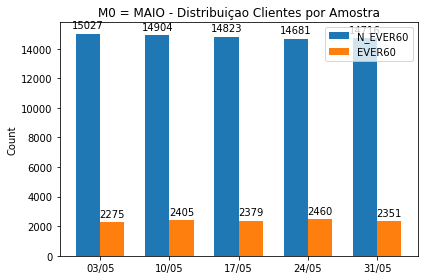

In [75]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['03/05','10/05','17/05','24/05', '31/05']
n_inad = [15027, 14904, 14823, 14681, 14716]
inad = [2275, 2405, 2379, 2460, 2351]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, n_inad, width, label='N_EVER60')
rects2 = ax.bar(x + width/2, inad, width, label='EVER60')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('M0 = MAIO - Distribuiçao Clientes por Amostra')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

fig.savefig('../Reports/Coleta_Dados/dist_amostra_m0_maio.png')

### 2)JUNHO

In [65]:
df2_ativos_e_bloqueados_aptos.groupby(['DAY','EVER60'])['CLIENTID'].count().reset_index(name='COUNT')

DAY  EVER60  COUNT
0    7       0  22909
1    7       1   3716
2   14       0  22720
3   14       1   3787
4   21       0  22782
5   21       1   3524
6   28       0  22614
7   28       1   3553
8   30       0      1

In [66]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

df2_group = ['07/06','14/06','21/06','28/06']
labels = ['07/06','14/06','21/06','28/06']
n_inad = [22909, 22720, 22782, 22615]
inad = [3716, 3787, 3524, 3553]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, n_inad, width, label='N_EVER60')
rects2 = ax.bar(x + width/2, inad, width, label='EVER60')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('M0 = JUNHO - Distribuiçao Clientes por Amostra')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

fig.savefig('../Reports/Coleta_Dados/dist_amostra_m0_junho.png')

<Figure size 640x480 with 1 Axes>

### 3) JULHO

In [67]:
df3_ativos_e_bloqueados_aptos.groupby(['DAY','EVER60'])['CLIENTID'].count().reset_index(name='COUNT')

DAY  EVER60  COUNT
0    5       0  26203
1    5       1   4098
2   12       0  26121
3   12       1   4107
4   19       0  25794
5   19       1   4237
6   26       0  25748
7   26       1   4160
8   31       0      2

In [68]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

df2_group = ['05/07','12/07','19/07','26/07']
labels = ['07/06','14/06','21/06','28/06']
n_inad = [26203, 26121, 25794, 25750]
inad = [4098, 4107, 4237, 4160]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, n_inad, width, label='N_EVER60')
rects2 = ax.bar(x + width/2, inad, width, label='EVER60')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('M0 = JULHO - Distribuiçao Clientes por Amostra')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

fig.savefig('../Reports/Coleta_Dados/dist_amostra_m0_julho.png')

### 4) AGOSTO

In [71]:
df4_ativos_e_bloqueados_aptos.groupby(['DAY','EVER60'])['CLIENTID'].count().reset_index(name='COUNT')

DAY  EVER60  COUNT
0    2       0  23249
1    2       1   3617
2    9       0  23109
3    9       1   3732
4   16       0  23050
5   16       1   3611
6   23       0  22847
7   23       1   3732
8   30       0  22823
9   30       1   3756

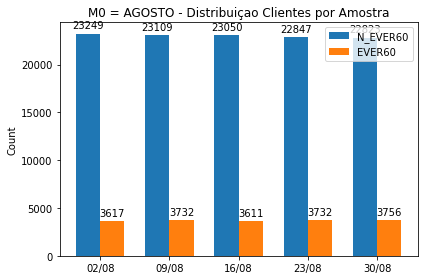

In [72]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['02/08','09/08','16/08','23/08', '30/08']
n_inad = [23249, 23109, 23050, 22847, 22823]
inad = [3617, 3732, 3611, 3732, 3756]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, n_inad, width, label='N_EVER60')
rects2 = ax.bar(x + width/2, inad, width, label='EVER60')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('M0 = AGOSTO - Distribuiçao Clientes por Amostra')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

fig.savefig('../Reports/Coleta_Dados/dist_amostra_m0_agosto.png')

### 5) SETEMBRO

In [70]:
df5_ativos_e_bloqueados_aptos.groupby(['DAY','EVER60'])['CLIENTID'].count().reset_index(name='COUNT')

DAY  EVER60  COUNT
0    2       0  23249
1    2       1   3617
2    9       0  23109
3    9       1   3732
4   16       0  23050
5   16       1   3611
6   23       0  22847
7   23       1   3732
8   30       0  22823
9   30       1   3756

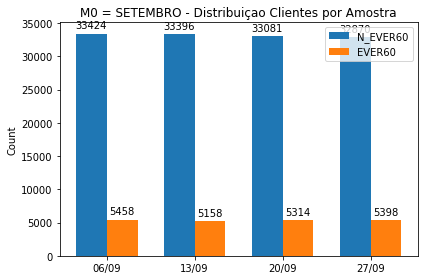

In [301]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['06/09','13/09','20/09','27/09']
n_inad = [33424, 33396, 33081, 32870]
inad = [5458, 5158, 5314, 5398]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, n_inad, width, label='N_EVER60')
rects2 = ax.bar(x + width/2, inad, width, label='EVER60')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('M0 = SETEMBRO - Distribuiçao Clientes por Amostra')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

fig.savefig('../Reports/Coleta_Dados/dist_amostra_m0_setembro.png')